In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from charset_normalizer import from_path

In [2]:
result = from_path("..\\..\\data\\collocations\\processed_collocations_set_from_the_supervisor.csv").best()

df = pd.read_csv("..\\..\\data\\collocations\\processed_collocations_set_from_the_supervisor.csv", encoding=result.encoding)

df

,DocumentName,OriginalCollocation,NormalizedCollocation,Frequency
0,VoenObozrenN_0001.t,западный блок,западный блок,2
1,VoenObozrenN_0001.t,беспилотный аппарат,беспилотный аппарат,1
2,VoenObozrenN_0001.t,борт судно,борт судна,1
3,VoenObozrenN_0001.t,высокий точность,высокая точность,1
4,VoenObozrenN_0001.t,высокий уровень технический оснащенность,высокий уровень технической оснащенности,1
...,...,...,...,...
132876,Voen_Obozren_060524_011094.t,флагманский дрон,флагманский дрон,1
132877,Voen_Obozren_060524_011094.t,флагманский дрон разведчик,флагманский дрон-разведчик,1
132878,Voen_Obozren_060524_011094.t,фортификационный вооружение,фортификационное вооружение,1
132879,Voen_Obozren_060524_011094.t,человеческий ошибка,человеческая ошибка,1


In [3]:
reference_df = pd.read_csv("..\\..\\data\\words\\processed_words_set_from_the_supervisor.csv", encoding='windows-1251')
get_suffix = lambda name: str(name)[-7:]
reference_suffixes = set(reference_df["DocumentName"].apply(get_suffix))
df = df[df["DocumentName"].apply(get_suffix).isin(reference_suffixes)].copy()
df

,DocumentName,OriginalCollocation,NormalizedCollocation,Frequency
0,VoenObozrenN_0001.t,западный блок,западный блок,2
1,VoenObozrenN_0001.t,беспилотный аппарат,беспилотный аппарат,1
2,VoenObozrenN_0001.t,борт судно,борт судна,1
3,VoenObozrenN_0001.t,высокий точность,высокая точность,1
4,VoenObozrenN_0001.t,высокий уровень технический оснащенность,высокий уровень технической оснащенности,1
...,...,...,...,...
1844,VoenObozrenN_0021.t,учение нато,учения НАТО,1
1845,VoenObozrenN_0021.t,холодный война,Холодная война,1
1846,VoenObozrenN_0021.t,цель нато,цель НАТО,1
1847,VoenObozrenN_0021.t,цель учение,цели учения,1


In [4]:
df['Frequency'] = df['Frequency'].astype(int)

In [5]:
doc_word_matrix = df.pivot_table(
    index='DocumentName',
    columns='NormalizedCollocation',
    values='Frequency',
    aggfunc='sum',
    fill_value=0
)

doc_word_matrix

NormalizedCollocation,"""Венгард""","""Клавесин 1РЭ""","""Свирель""","""Хардберри-РусФактор""",16-й Центральный научно-исследовательский испытательный институт,"3,5-метровый отечественный надводный бэтмобиль БПЛА Афалина",5 км,6-го поколений,9-мм пистолет,90-х годах,...,ядерная триада,ядерное оружие,ядерное сдерживание,ядерной БЧ,ядерные силы,ядерный взрыв,ядерный клык,ядерный паритет,ядерный удар,ядерный удар по Москве
DocumentName,,,,,,,,,,,,,,,,,,,,,
VoenObozrenN_0001.t,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VoenObozrenN_0002.t,1,0,0,0,0,0,0,0,0,1,...,2,8,4,1,2,1,1,1,10,2
VoenObozrenN_0003.t,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VoenObozrenN_0004.t,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VoenObozrenN_0005.t,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VoenObozrenN_0006.t,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VoenObozrenN_0007.t,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VoenObozrenN_0008.t,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
VoenObozrenN_0009.t,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=doc_word_matrix.index, columns=doc_word_matrix.index)
similarity_df.to_csv("..\\..\\data\\collocations\\cosine_similarity_matrix.csv", index=True)
similarity_df

DocumentName,VoenObozrenN_0001.t,VoenObozrenN_0002.t,VoenObozrenN_0003.t,VoenObozrenN_0004.t,VoenObozrenN_0005.t,VoenObozrenN_0006.t,VoenObozrenN_0007.t,VoenObozrenN_0008.t,VoenObozrenN_0009.t,VoenObozrenN_0010.t,...,VoenObozrenN_0012.t,VoenObozrenN_0013.t,VoenObozrenN_0014.t,VoenObozrenN_0015.t,VoenObozrenN_0016.t,VoenObozrenN_0017.t,VoenObozrenN_0018.t,VoenObozrenN_0019.t,VoenObozrenN_0020.t,VoenObozrenN_0021.t
DocumentName,,,,,,,,,,,,,,,,,,,,,
VoenObozrenN_0001.t,1.000000,0.000000,0.000000,0.038897,0.008837,0.000000,0.000000,0.000000,0.000000,0.008146,...,0.000000,0.011701,0.000000,0.000000,0.003741,0.000000,0.008985,0.000000,0.007120,0.000000
VoenObozrenN_0002.t,0.000000,1.000000,0.000000,0.018045,0.004177,0.000000,0.003663,0.032614,0.011717,0.000000,...,0.003907,0.000000,0.000000,0.004917,0.005779,0.002240,0.000000,0.011235,0.015252,0.001640
VoenObozrenN_0003.t,0.000000,0.000000,1.000000,0.000000,0.000000,0.008792,0.000000,0.014196,0.023557,0.117437,...,0.000000,0.000000,0.000000,0.020118,0.006212,0.017788,0.012635,0.000000,0.025030,0.005796
VoenObozrenN_0004.t,0.038897,0.018045,0.000000,1.000000,0.072804,0.004521,0.000000,0.017415,0.006610,0.030999,...,0.000000,0.044529,0.023018,0.000000,0.016847,0.011696,0.034194,0.003098,0.054787,0.007270
VoenObozrenN_0005.t,0.008837,0.004177,0.000000,0.072804,1.000000,0.000000,0.000000,0.000000,0.008265,0.013469,...,0.000000,0.019347,0.040215,0.010088,0.024984,0.000000,0.014857,0.000000,0.041971,0.000000
VoenObozrenN_0006.t,0.000000,0.000000,0.008792,0.004521,0.000000,1.000000,0.000000,0.002873,0.002924,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002567,0.003981,0.000000,0.000000,0.000000,0.000000
VoenObozrenN_0007.t,0.000000,0.003663,0.000000,0.000000,0.000000,0.000000,1.000000,0.012612,0.000000,0.011320,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.025989,0.000000,0.008975,0.000000,0.000000
VoenObozrenN_0008.t,0.000000,0.032614,0.014196,0.017415,0.000000,0.002873,0.012612,1.000000,0.002312,0.002609,...,0.000000,0.000000,0.009099,0.001666,0.035592,0.000000,0.034123,0.000000,0.009110,0.011180
VoenObozrenN_0009.t,0.000000,0.011717,0.023557,0.006610,0.008265,0.002924,0.000000,0.002312,1.000000,0.021943,...,0.000000,0.000000,0.000000,0.106804,0.007783,0.003203,0.000000,0.004032,0.015430,0.000000


In [7]:
def save_clusters(labels, method_name):
    cluster_df = pd.DataFrame({"Document": doc_word_matrix.index, "Cluster": labels})
    cluster_df.to_csv(f"..\\..\\data\\collocations\\{method_name}_clusters.csv", index=False)

def save_cluster_centers(tfidf_matrix, labels, method_name):
    unique_clusters = np.unique(labels)
    cluster_centers = []

    for cluster in unique_clusters:
        if cluster == -1:
            continue
        cluster_indices = np.where(labels == cluster)[0]
        cluster_vectors = tfidf_matrix[cluster_indices].toarray()
        center_idx = np.argmin(cdist([cluster_vectors.mean(axis=0)], cluster_vectors)[0])
        central_file = doc_word_matrix.index[cluster_indices[center_idx]]
        cluster_centers.append((cluster, central_file))

    centers_df = pd.DataFrame(cluster_centers, columns=["Cluster", "Central_File"])
    centers_df.to_csv(f"..\\..\\data\\collocations\\{method_name}_cluster_centers.csv", index=False)

In [13]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
save_clusters(kmeans_labels, "kmeans")
save_cluster_centers(tfidf_matrix, kmeans_labels, "kmeans")

In [14]:
eps = 0.6
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
dbscan_labels = dbscan.fit_predict(tfidf_matrix)
save_clusters(dbscan_labels, "dbscan")
save_cluster_centers(tfidf_matrix, dbscan_labels, "dbscan")

In [17]:
n_clusters_agglo = 10
agglo = AgglomerativeClustering(n_clusters=n_clusters_agglo, metric="cosine", linkage="average")
agglo_labels = agglo.fit_predict(tfidf_matrix.toarray())
save_clusters(agglo_labels, "agglomerative")
save_cluster_centers(tfidf_matrix, agglo_labels, "agglomerative")

In [18]:
def load_clusters(file_name):
    return pd.read_csv(file_name)

In [19]:
kmeans_clusters = load_clusters("..\\..\\data\\collocations\\kmeans_clusters.csv")
dbscan_clusters = load_clusters("..\\..\\data\\collocations\\dbscan_clusters.csv")
agglo_clusters = load_clusters("..\\..\\data\\collocations\\agglomerative_clusters.csv")

kmeans_cluster_centers = load_clusters("..\\..\\data\\collocations\\kmeans_cluster_centers.csv")
dbscan_cluster_centers = load_clusters("..\\..\\data\\collocations\\dbscan_cluster_centers.csv")
agglo_cluster_centers = load_clusters("..\\..\\data\\collocations\\agglomerative_cluster_centers.csv")

In [31]:
def visualize_clusters(labels, tfidf_matrix, method_name):
    tsne = TSNE(n_components=2, random_state=20, perplexity=20, n_iter=1000, metric='cosine')
    tsne_res = tsne.fit_transform(tfidf_matrix.toarray())

    unique_labels = np.unique(labels)
    cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=labels, cmap=cmap, s=10, alpha=0.9)
    plt.colorbar(scatter, label=f'{method_name} Cluster', ticks=range(len(unique_labels)))
    plt.title(f't-SNE визуализация кластеров {method_name}')
    plt.xlabel('t-SNE измерение 1')
    plt.ylabel('t-SNE измерение 2')
    plt.grid(True)
    plt.show()

    unique_clusters, counts = np.unique(labels, return_counts=True)
    print(f"{method_name} кластеры:", dict(zip(unique_clusters, counts)))

In [32]:
def generate_word_cloud(cluster_label, cluster_df, method_name):
    cluster_files = cluster_df[cluster_df['Cluster'] == cluster_label]['Document']
    print(f"Файлы в кластере {cluster_label} ({method_name}):")
    for f in cluster_files:
        print(f)

    for doc_name in cluster_files:
        doc_data = df[df['DocumentName'] == doc_name]
        word_freq = dict(zip(doc_data['NormalizedCollocation'], doc_data['Frequency']))
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Облако слов для {doc_name}')
        plt.show()

In [33]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_14188\1405270259.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


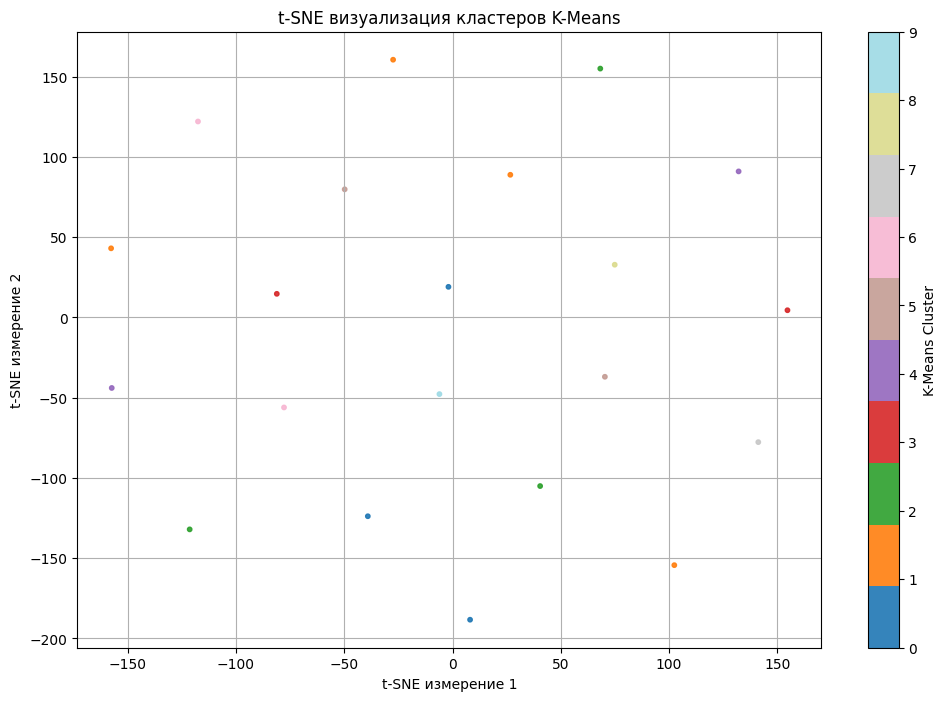

K-Means кластеры: {0: 3, 1: 4, 2: 3, 3: 2, 4: 2, 5: 2, 6: 2, 7: 1, 8: 1, 9: 1}
Файлы в кластере 6 (K-Means):
VoenObozrenN_0007.t
VoenObozrenN_0017.t


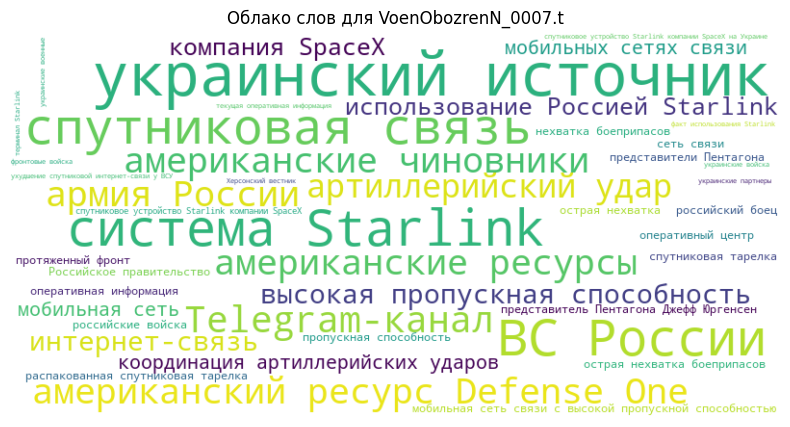

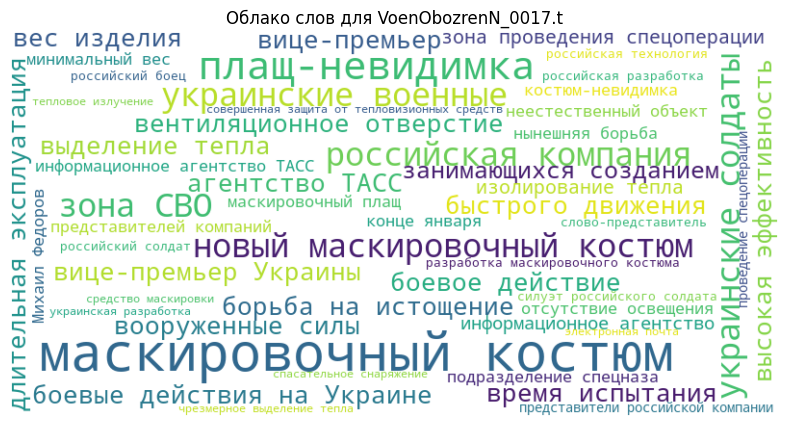

,Document,Cluster
0,VoenObozrenN_0001.t,8
1,VoenObozrenN_0002.t,0
2,VoenObozrenN_0003.t,2
3,VoenObozrenN_0004.t,1
4,VoenObozrenN_0005.t,1
5,VoenObozrenN_0006.t,2
6,VoenObozrenN_0007.t,6
7,VoenObozrenN_0008.t,0
8,VoenObozrenN_0009.t,4
9,VoenObozrenN_0010.t,2


In [34]:
visualize_clusters(kmeans_clusters['Cluster'].values, tfidf_matrix, "K-Means")
generate_word_cloud(6, kmeans_clusters, "K-Means")
kmeans_clusters

In [35]:
kmeans_cluster_centers[:25]

,Cluster,Central_File
0,0,VoenObozrenN_0008.t
1,1,VoenObozrenN_0004.t
2,2,VoenObozrenN_0003.t
3,3,VoenObozrenN_0019.t
4,4,VoenObozrenN_0009.t
5,5,VoenObozrenN_0011.t
6,6,VoenObozrenN_0007.t
7,7,VoenObozrenN_0014.t
8,8,VoenObozrenN_0001.t
9,9,VoenObozrenN_0018.t


C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_14188\1405270259.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


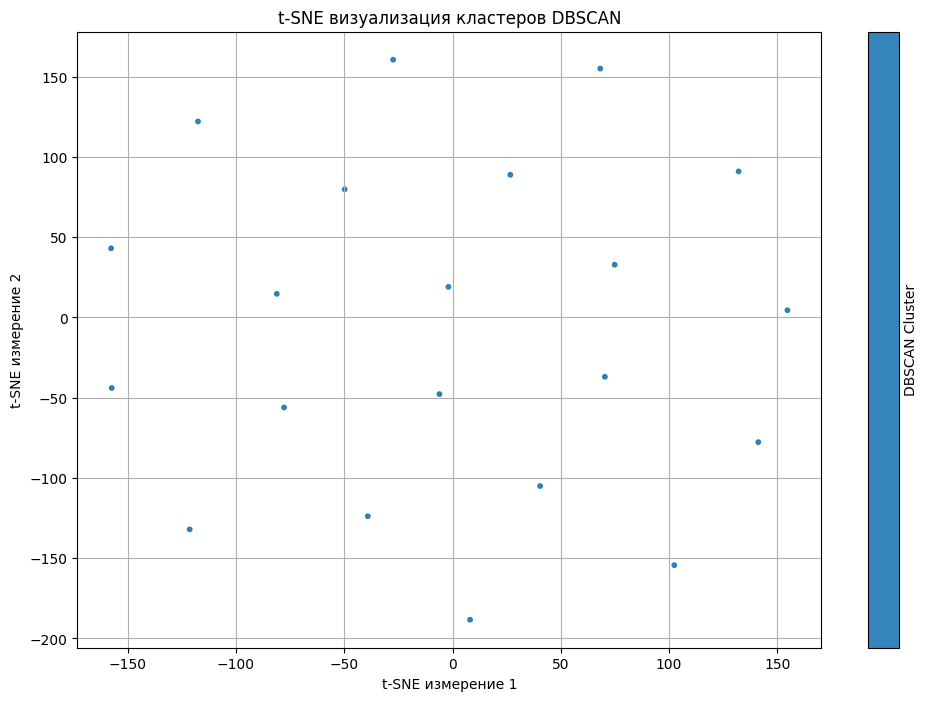

DBSCAN кластеры: {-1: 21}
Файлы в кластере 8 (DBSCAN):


,Document,Cluster
0,VoenObozrenN_0001.t,-1
1,VoenObozrenN_0002.t,-1
2,VoenObozrenN_0003.t,-1
3,VoenObozrenN_0004.t,-1
4,VoenObozrenN_0005.t,-1
5,VoenObozrenN_0006.t,-1
6,VoenObozrenN_0007.t,-1
7,VoenObozrenN_0008.t,-1
8,VoenObozrenN_0009.t,-1
9,VoenObozrenN_0010.t,-1


In [36]:
visualize_clusters(dbscan_clusters['Cluster'].values, tfidf_matrix, "DBSCAN")
generate_word_cloud(8, dbscan_clusters, "DBSCAN")
dbscan_clusters

In [37]:
dbscan_cluster_centers

,Cluster,Central_File


C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_14188\1405270259.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


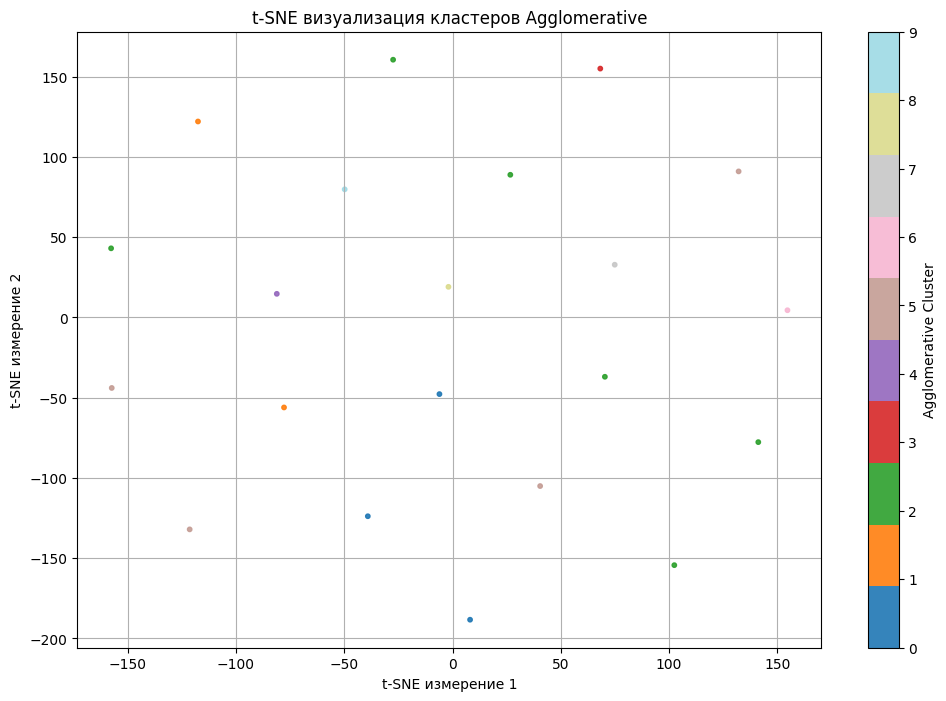

Agglomerative кластеры: {0: 3, 1: 2, 2: 6, 3: 1, 4: 1, 5: 4, 6: 1, 7: 1, 8: 1, 9: 1}
Файлы в кластере 11 (Agglomerative):


,Document,Cluster
0,VoenObozrenN_0001.t,7
1,VoenObozrenN_0002.t,8
2,VoenObozrenN_0003.t,5
3,VoenObozrenN_0004.t,2
4,VoenObozrenN_0005.t,2
5,VoenObozrenN_0006.t,3
6,VoenObozrenN_0007.t,1
7,VoenObozrenN_0008.t,0
8,VoenObozrenN_0009.t,5
9,VoenObozrenN_0010.t,5


In [38]:
visualize_clusters(agglo_clusters['Cluster'].values, tfidf_matrix, "Agglomerative")
generate_word_cloud(11, agglo_clusters, "Agglomerative")
agglo_clusters

In [39]:
agglo_cluster_centers

,Cluster,Central_File
0,0,VoenObozrenN_0008.t
1,1,VoenObozrenN_0007.t
2,2,VoenObozrenN_0020.t
3,3,VoenObozrenN_0006.t
4,4,VoenObozrenN_0019.t
5,5,VoenObozrenN_0010.t
6,6,VoenObozrenN_0021.t
7,7,VoenObozrenN_0001.t
8,8,VoenObozrenN_0002.t
9,9,VoenObozrenN_0012.t


In [40]:
output_path = "..\\..\\data\\collocations\\dataprocessed_dataset.csv"
df.to_csv(output_path, index=False, encoding='windows-1251')
print(f"Данные успешно сохранены в {output_path}")

Данные успешно сохранены в ..\..\data\collocations\dataprocessed_dataset.csv
